In [2]:
import sqlalchemy as sa
from pprint import pprint
from langchain_community.utilities import SQLDatabase


db = SQLDatabase.from_uri("sqlite:///db/db/horror.db")
metadata = sa.MetaData()
lingyizhi = sa.Table(
    "lingyizhi",
    metadata,
    sa.Column("id", sa.INTEGER, primary_key=True),
    sa.Column("title", sa.TEXT),
    sa.Column("content", sa.TEXT),
)

keywords = ["公交", "地铁", "出租车", "卡车", "火车", "货车", "动车", "高铁", "飞机", "灵车"]

conditions = [lingyizhi.c.title.like(f'%{keyword}%') for keyword in keywords]
query = sa.select(lingyizhi).where(sa.or_(*conditions))

result = db.run(query, fetch="cursor")
pprint(list(result.mappings()))

[{'id': 207, 'title': '送灵车内车的鬼影（续）', 'content': '送灵车内的鬼影\r\n                \r\n                    懒鬼先生\r\n                    \r\n                        \r\n                            20年12月1日\r\n                        \r\n                        \r\n                            喜欢：3\r\n                        \r\n                        \r\n                            浏览：2.6k\r\n                        \r\n                    \r\n                \r\n            \n第二天，一早拉长带着我去了一趟集市购买一些做法事的东西。\n路上我和拉长讨论着，今天中午给她做了法事后她是不是就能进屋了 还能和他们那些已故的长辈们共用香炉？\n拉长边挑东西边笑呵呵的说 小李啊 你可能看多鬼故事或者电影了，有些事情啊往往看似简单却不以为然啊 要想能共用一个香炉还要等入土后 做最后的事给他们那些祖宗啥的念叨念叨啊哈的 才行呢。\n那今儿的法事是做什么，拉长继续说道 今儿做的法事是 让她本人知道自己已故 人走阳关道 鬼走阴关路呀 不要继续存在人家或者粘着亲人不放 这样只会让她亲人不好反而会害了他们。。\n等快到了中午的时候 拉长开着他的小绵羊电动车慢悠悠带着我赶到了客户家里 吃了午饭就开始摆坛做法事，拉长穿上了道袍手抓着那个啥 佛尘\n在法坛面前走起了七星步伐 抓着 佛尘 用底部对着法坛画着 嘴里念着道语 原地一踏 喊着 亲人 跪 什么三拜九叩的\xa0 站在了旁边念着\xa0 白色纸写的东西 然后又是三拜九叩 走到死者门面前还要下跪叩首。。。最后拉长喊着一句放炮。。😂😂\xa0 我一下反应不过来还以为是干嘛呢 结果要我去放鞭炮。。。\n当法事做完后，拉长要我把临时灵位摆在死者脚下 上柱香 再回来 我起身后眼角 突然看到死者

In [11]:
from langchain_core.prompts import ChatPromptTemplate,SystemMessagePromptTemplate,HumanMessagePromptTemplate
from langchain_core.output_parsers import StrOutputParser
from dotenv import load_dotenv
from langchain_groq import ChatGroq
import re


load_dotenv()
chat = ChatGroq(
    temperature=0,
    model="llama3-70b-8192",
    model_kwargs={
        "frequency_penalty": 0.5,
        "presence_penalty": 0.5
    },
    # api_key="" # Optional if not set as an environment variable
)
prompt = ChatPromptTemplate.from_messages([SystemMessagePromptTemplate.from_template("你是一名灵异故事创作者。"),
                                           HumanMessagePromptTemplate.from_template(
"""
请写一篇关于{input}的5000字灵异故事。
输出格式：

- 标题（使用汉语）:
- 汉语关键词（使用汉语 1-3个）:
- 英语关键词（使用英语 1-3个）:
- 内容（使用汉语）:

""")])
# 创建链
chain = prompt | chat | StrOutputParser()
# 调用链
input = "两个宋家庄地铁站"
content = chain.invoke({"input": input})
content = re.sub('\n+','\n',content)
print(content)

- 标题: 《宋家庄的双重诅咒》
- 汉语关键词: 宋家庄、地铁站、诅咒
- 英语关键词: Songjiazhuang, Subway Station, Curse
内容：
宋家庄地铁站位于北京市西北部，是一座繁华的交通枢纽。然而，鲜为人知的是，这座地铁站竟然有两个完全相同的站台，分别位于地下一层和地下二层。很多乘客都曾经发现过这个奇怪的现象，但却不知道这是为什么。
小李是一个地铁迷，他每天都要经过宋家庄地铁站上下班。有一天，他发现了地下一层和地下二层的站台竟然是一模一样的，包括站台的设计、广告牌、甚至连站台上的垃圾桶都是相同的。他感到非常奇怪，于是决定调查这个秘密。
小李开始询问地铁站的工作人员，但他们都说不知道为什么会有两个相同的站台。于是，小李决定自己探索地下二层的站台。他带着照明灯和摄像机，独自下到了地下二层。
当小李来到地下二层的站台时，他发现这里非常阴森，空气中充满了恐怖的气息。他开始拍摄周围的环境，但摄像机却总是出现故障。突然，他听到一个女人的哭泣声，声音来自站台的深处。
小李感到非常恐怖，但他还是决定继续探索。他沿着站台走下去，发现了一个废弃的站台口。站台口上写着“宋家庄地铁站二号线”几个字，但这里明明是地下二层的站台啊！
小李感到非常困惑，于是他决定继续探索废弃的站台口。他发现这里有一条暗黑的通道，通道的尽头是一个废弃的站台。站台上有一幅巨大的壁画，画的是一个女人和一个男人，他们的脸上都带着悲伤的表情。
小李感到非常恐怖，他决定离开这里。但当他转身时，却发现通道已经消失了。他被困在了废弃的站台上，听到女人的哭泣声越来越近。
小李感到绝望，他开始呼叫救援，但这里没有任何信号。突然，女人出现在了他的面前，她的脸上带着悲伤的表情。
女人告诉小李，这里曾经是一座古老的墓地，埋葬着一对恋人。他们的爱情被家人所禁止，于是他们决定私奔。但是，他们的私奔计划被家人发现，于是他们被杀害在这里。
女人告诉小李，宋家庄地铁站的两个站台是他们的诅咒。他们的灵魂被困在这里，无法超生。女人请求小李帮助他们超生，于是小李决定帮助他们。
小李和女人一起探索废弃的站台，发现了一个古老的墓碑。墓碑上写着一对恋人的名字和他们的故事。小李感到非常感动，于是他决定帮助他们超生。
小李和女人一起烧香祭祀，请求他们的灵魂超生。终于，女人和男人出现在了小李的面前，他们的脸上带着感恩的表情。
小李

In [1]:
import pyttsx3
engine = pyttsx3.init()

engine.setProperty('rate', 150)  # 设置语速
engine.setProperty('volume', 0.9)  # 设置音量

text = """- 标题: 《宋家庄的双重诅咒》
- 汉语关键词: 宋家庄、地铁站、诅咒
- 英语关键词: Songjiazhuang, Subway Station, Curse
内容：
宋家庄地铁站位于北京市西北部，是一座繁华的交通枢纽。然而，鲜为人知的是，这座地铁站竟然有两个完全相同的站台，分别位于地下一层和地下二层。很多乘客都曾经发现过这个奇怪的现象，但却不知道这是为什么。
小李是一个地铁迷，他每天都要经过宋家庄地铁站上下班。有一天，他发现了地下一层和地下二层的站台竟然是一模一样的，包括站台的设计、广告牌、甚至连站台上的垃圾桶都是相同的。他感到非常奇怪，于是决定调查这个秘密。
小李开始询问地铁站的工作人员，但他们都说不知道为什么会有两个相同的站台。于是，小李决定自己探索地下二层的站台。他带着照明灯和摄像机，独自下到了地下二层。
当小李来到地下二层的站台时，他发现这里非常阴森，空气中充满了恐怖的气息。他开始拍摄周围的环境，但摄像机却总是出现故障。突然，他听到一个女人的哭泣声，声音来自站台的深处。
小李感到非常恐怖，但他还是决定继续探索。他沿着站台走下去，发现了一个废弃的站台口。站台口上写着“宋家庄地铁站二号线”几个字，但这里明明是地下二层的站台啊！
小李感到非常困惑，于是他决定继续探索废弃的站台口。他发现这里有一条暗黑的通道，通道的尽头是一个废弃的站台。站台上有一幅巨大的壁画，画的是一个女人和一个男人，他们的脸上都带着悲伤的表情。
小李感到非常恐怖，他决定离开这里。但当他转身时，却发现通道已经消失了。他被困在了废弃的站台上，听到女人的哭泣声越来越近。
小李感到绝望，他开始呼叫救援，但这里没有任何信号。突然，女人出现在了他的面前，她的脸上带着悲伤的表情。
女人告诉小李，这里曾经是一座古老的墓地，埋葬着一对恋人。他们的爱情被家人所禁止，于是他们决定私奔。但是，他们的私奔计划被家人发现，于是他们被杀害在这里。
女人告诉小李，宋家庄地铁站的两个站台是他们的诅咒。他们的灵魂被困在这里，无法超生。女人请求小李帮助他们超生，于是小李决定帮助他们。
小李和女人一起探索废弃的站台，发现了一个古老的墓碑。墓碑上写着一对恋人的名字和他们的故事。小李感到非常感动，于是他决定帮助他们超生。
小李和女人一起烧香祭祀，请求他们的灵魂超生。终于，女人和男人出现在了小李的面前，他们的脸上带着感恩的表情。
小李感到非常高兴，他帮助了他们超生。于是，他离开了废弃的站台，回到地面上。从那天起，小李再也没有看到过地下二层的站台，他知道宋家庄地铁站的诅咒已经被解除。
然而，很多乘客还是报告说他们看到过地下二层的站台，听到过女人的哭泣声。宋家庄地铁站的诅咒似乎还没有被完全解除。小李感到非常恐怖，他不知道自己是否真的帮助了他们超生。"""
engine.say(text)
engine.runAndWait()
engine.stop()

Loaded as API: https://bytedance-sdxl-lightning.hf.space ✔
生成的图像保存路径：/private/var/folders/_v/t8wzr_fj2gj83msgwd4t179c0000gn/T/gradio/a24d8c8fa7d3fa163c4383e2672349537dc75981/image.webp
图像已保存到 imgs/《宋家庄的双重诅咒》.png


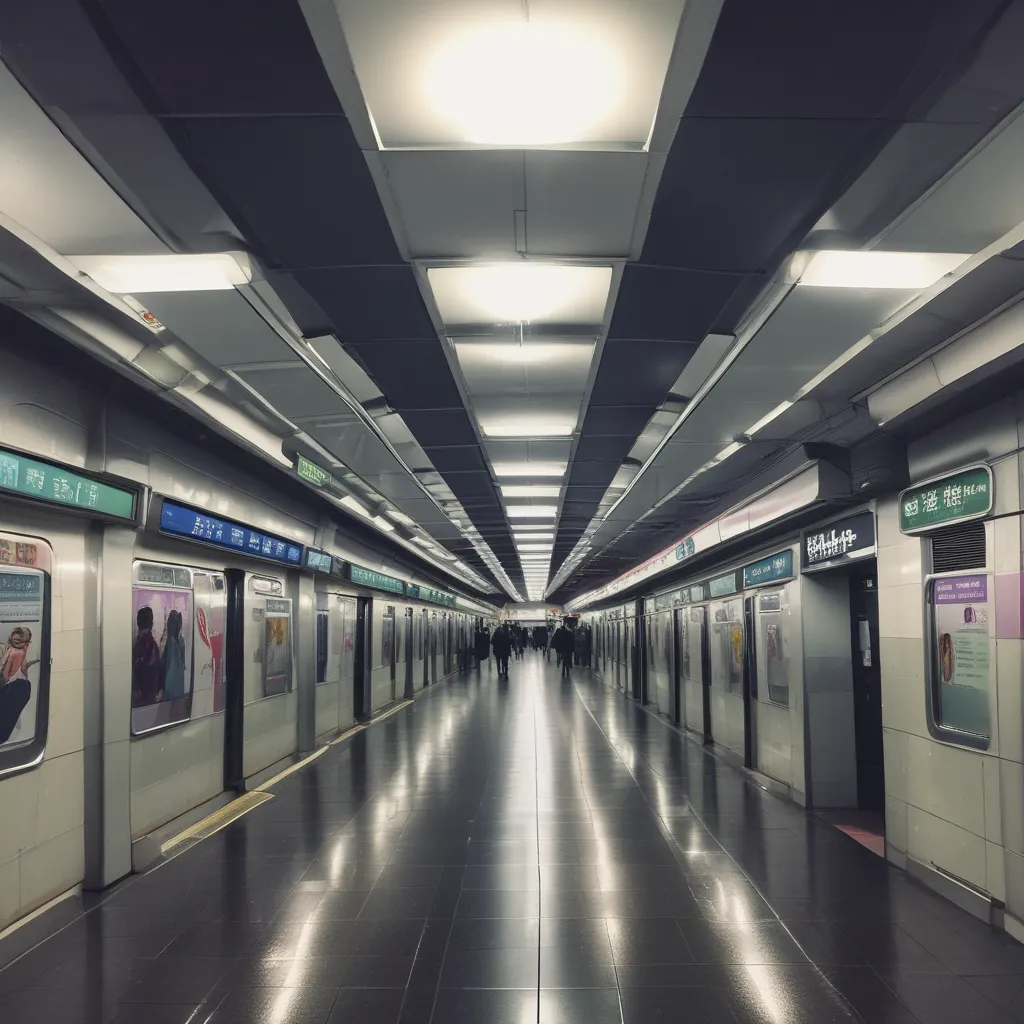

In [12]:
from gradio_client import Client
import os
import shutil
from IPython.display import Image  # 引入 IPython 的 Image 类来显示图像

# 创建一个客户端
client = Client("ByteDance/SDXL-Lightning")

# 指定保存路径
save_directory = "imgs"
save_filename = "《宋家庄的双重诅咒》.png"

# 发起预测请求并获取结果（假设result返回的是图像文件的保存路径）
result = client.predict(
    prompt="Songjiazhuang, Subway Station, Curse",
    ckpt="4-Step",
    api_name="/generate_image",
)

# 打印返回的图像文件路径
print(f"生成的图像保存路径：{result}")

# 检查结果是否是字符串，并且是一个有效的文件路径
if isinstance(result, str) and os.path.isfile(result):
    # 构建要保存的目标路径
    target_path = os.path.join(save_directory, save_filename)
    # 创建目标目录（如果不存在）
    os.makedirs(save_directory, exist_ok=True)
    # 移动文件到指定路径下
    shutil.move(result, target_path)
    print(f"图像已保存到 {target_path}")
    # 显示图像在 Jupyter Notebook 中
    display(Image(filename=target_path))  # 使用 IPython 的 display 函数显示图像
else:
    print("未能正确获取图像文件路径或路径无效。")


**SDXL-Lightning**

SDXL-Lightning是由字节跳动(ByteDance)开发的一款高速文本生成图像模型，它在保持高质量输出的同时大幅提升了生成速度[1][2].

这个模型的主要特点如下:

1. 快速生成: SDXL-Lightning能在几秒内生成1024px分辨率的图像，比传统模型快约10倍[1][2].

2. 高质量输出: 即使在2-8步的快速生成中，其图像质量也能与SDXL模型32步的生成效果相媲美[1].

3. 创新技术: 模型采用了渐进式对抗蒸馏(Progressive Adversarial Distillation)技术，结合了渐进式和对抗式蒸馏方法[1][3].

4. 灵活性: 提供了1步、2步、4步和8步的模型检查点，用户可根据需求选择速度和质量的平衡点[4].

5. 广泛应用: 适用于需要快速、实时生成图像的场景[3].

6. 开源可用: 模型已在Hugging Face平台上开放，供社区使用和研究[2].

SDXL-Lightning的工作原理是从Stability AI的stable-diffusion-xl-base-1.0模型中提炼而来。渐进式蒸馏保证了模型能保留原有的图像风格和多样性，而对抗式蒸馏则用于提升图像生成质量[1].

在实际应用中，SDXL-Lightning在4步的条件下，其图像质量和风格多样性已经明显优于Turbo和LCM等其他快速生成模型[1]. 这使得SDXL-Lightning在快速生成高质量图像方面具有显著优势，为AI绘画领域带来了新的可能性。

Citations:
- [1] https://www.uisdc.com/sdxl-lightning
- [2] https://developer.volcengine.com/articles/7344023070115381258
- [3] https://blog.csdn.net/cxyxx12/article/details/137959571
- [4] https://news.miracleplus.com/share_link/18858
- [5] https://www.youtube.com/watch?v=Ny0OXoispfo

**SDXL**

Stable Diffusion XL (SDXL) 1.0是Stability AI发布的最新一代文本生成图像模型,相比之前的版本有了显著的改进。以下是SDXL base 1.0模型的一些关键原理和特点:

1. 模型架构:
SDXL采用了级联扩散模型架构,包括Base模型和Refiner模型两个阶段[1]. Base模型负责生成图像的整体构图和内容,Refiner模型则进一步优化细节.

2. 参数规模:
SDXL的参数量从之前的0.98B增加到了6.6B,大幅提升了模型的能力[2].

3. 图像尺寸条件化:
引入了图像尺寸作为额外的条件嵌入U-Net模型中,使模型能够更好地适应不同分辨率的图像生成[1].

4. 多尺度训练:
采用了多尺度训练策略,提高了模型对不同尺寸图像的生成能力[1].

5. 改进的组件:
对U-Net、VAE和CLIP文本编码器等核心组件都进行了优化[1].

6. 高分辨率:
SDXL原生支持1024x1024分辨率的图像生成,大幅提升了图像质量[2].

7. 增强的语言理解:
改进了对自然语言提示的理解能力,可以更好地处理完整句子形式的提示词[4].

8. 丰富的艺术风格:
内置了多种艺术风格,如动漫、数字插画、胶片摄影等,可以通过提示词轻松切换[4].

9. 改进的细节生成:
在手部、文字和空间布局等难点领域有了显著提升[3].

10. 优化的色彩和光影:
在色彩鲜艳度、准确度以及对比度、光线和阴影方面都有所改进[3].

SDXL 1.0的这些改进使其成为目前最强大的开源图像生成模型之一,为AI绘画领域带来了新的可能性。它不仅提高了生成图像的质量和多样性,还降低了用户使用的门槛,为未来的应用开发奠定了基础。

Citations:
- [1] https://hub.baai.ac.cn/view/29343
- [2] https://www.wehelpwin.com/m_article/4151
- [3] https://blog.csdn.net/liuz_notes/article/details/134207738
- [4] https://www.uisdc.com/stable-diffusion-guide-4
- [5] https://aws.amazon.com/cn/blogs/china/image-generation-using-stable-diffusion-xl-and-sdxl-lora-and-controlnet/


**Base模型和Refiner模型的具体工作流程**

Stable Diffusion XL (SDXL)的Base模型和Refiner模型构成了一个两阶段的级联扩散模型,其工作流程如下:

1. Base模型阶段:

- 接收文本提示词和其他条件输入(如图像尺寸等)
- 通过U-Net生成初始的潜在特征(latent features)
- 这些特征包含了图像的整体构图和主要内容

2. Refiner模型阶段:

- 接收Base模型生成的潜在特征
- 对这些特征添加一定程度的噪声
- 使用专门的Refiner U-Net模型对带噪声的特征进行去噪和细化
- 提升图像的整体质量和局部细节

3. 最终输出:

- 经过Refiner处理后的潜在特征通过VAE解码器生成最终的高质量图像

这个两阶段流程的主要优势是:

- Base模型负责生成图像的基本结构和内容
- Refiner模型专注于优化细节,提升图像质量
- 相比单一模型,这种级联结构能产生更高质量、更细致的图像[1][4]

值得注意的是,Refiner模型本质上是在进行一种特殊的图生图(image-to-image)任务,它以Base模型的输出为基础,进一步改进和精细化图像内容[4].

这种级联架构使SDXL能够在保持高效生成的同时,显著提升输出图像的质量和细节表现.

Citations:
- [1] https://www.youtube.com/watch?v=nPBCfHhORdc
- [2] https://www.cnblogs.com/lm970585581/p/18140564
- [3] https://www.cnblogs.com/owenma/p/8723551.html
- [4] https://aws.amazon.com/cn/blogs/china/image-generation-using-stable-diffusion-xl-and-sdxl-lora-and-controlnet/
- [5] https://www.toolify.ai/zh/ai-news-cn/%E5%BC%80%E6%BA%90%E8%81%8A%E5%A4%A9%E6%A8%A1%E5%9E%8Bbase-%E6%A8%A1%E5%9E%8B%E7%9A%84%E8%AE%AD%E7%BB%83%E5%92%8C%E5%BA%94%E7%94%A8-902593

**Base模型生成的图像特征**

根据SDXL (Stable Diffusion XL)的工作流程,Base模型生成的图像具有以下主要特征:

1. 整体构图: Base模型负责生成图像的基本结构和整体布局[1][2]。

2. 主要内容: 它能够生成图像的主要内容和元素,但可能细节不够精细[2]。

3. 潜在特征: Base模型输出的是图像的潜在特征(latent features),而不是最终的像素级图像[1][2]。

4. 噪声存在: 生成的潜在特征中可能还包含一定程度的噪声,需要进一步处理[2]。

5. 高分辨率: SDXL Base模型支持1024x1024分辨率的图像生成,比之前的版本有显著提升[2]。

6. 多样化风格: 由于模型训练时采用了多尺度策略,Base模型能够生成多种艺术风格的图像[2]。

7. 改进的语言理解: Base模型对自然语言提示的理解能力有所提升,可以更好地处理完整句子形式的提示词[2]。

8. 色彩和光影: 相比之前的版本,Base模型在色彩鲜艳度、准确度以及对比度、光线和阴影方面都有所改进[2]。

需要注意的是,虽然Base模型已经能生成质量不错的图像,但为了获得更高质量和更精细的细节,通常还需要通过Refiner模型进行进一步处理[1][2]。

Citations:
- [1] https://www.toolify.ai/zh/ai-news-cn/%E5%BC%80%E6%BA%90%E8%81%8A%E5%A4%A9%E6%A8%A1%E5%9E%8Bbase-%E6%A8%A1%E5%9E%8B%E7%9A%84%E8%AE%AD%E7%BB%83%E5%92%8C%E5%BA%94%E7%94%A8-902593
- [2] https://hub.baai.ac.cn/view/29343
- [3] https://www.cnblogs.com/lm970585581/p/18140564
- [4] https://www.youtube.com/watch?v=nPBCfHhORdc
- [5] https://www.cnblogs.com/owenma/p/8723551.html

In [8]:
from PIL import Image
from docx import Document
from docx.shared import Inches

# 图片路径（webp格式）
webp_image_path = 'imgs/《宋家庄的双重诅咒》.webp'

# 转换后的图片路径（PNG格式）
png_image_path = 'imgs/converted_image.png'

# 打开并转换图片格式
with Image.open(webp_image_path) as img:
    img.save(png_image_path, 'PNG')

# 创建一个新的文档对象
doc = Document()

# 向文档中添加一个标题
doc.add_heading('示例文档', level=1)

# 向文档中添加一段文本
doc.add_paragraph('这是一个示例文档，下面将插入一张图片。')

try:
    # 插入图片
    doc.add_picture(png_image_path, width=Inches(5))
    print("图片插入成功")
except Exception as e:
    print(f"插入图片时出错: {e}")

# 保存文档
doc.save('docs/example.docx')
print("文档保存成功")


图片插入成功
文档保存成功


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

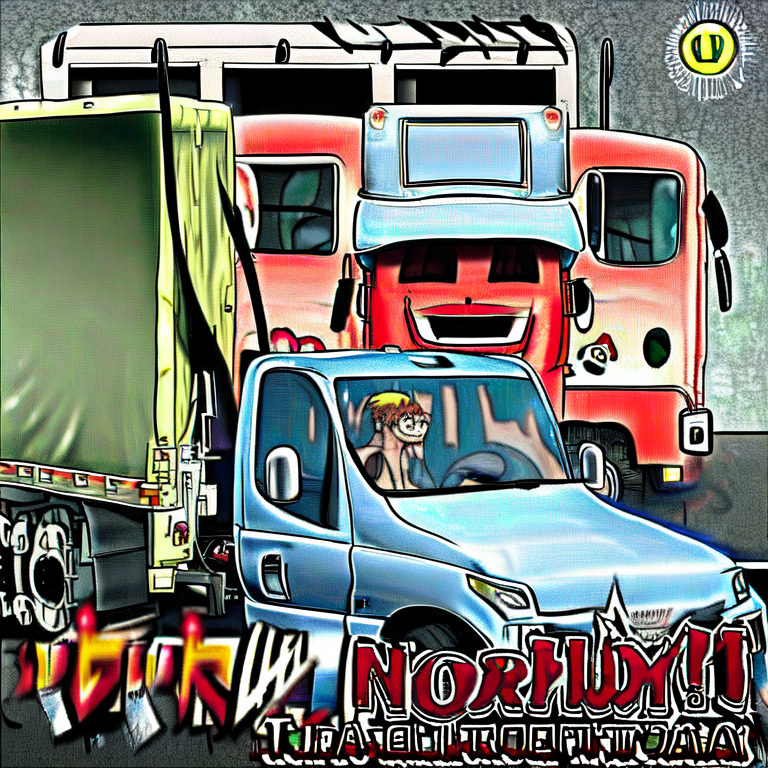

In [4]:
import torch
import time
from diffusers import StableDiffusionPipeline
from IPython.display import Image, display
from dotenv import load_dotenv

load_dotenv()

pipe = StableDiffusionPipeline.from_pretrained("waifu-diffusion/wd-1-5-beta3", 
                                               torch_dtype=torch.float32, 
                                               safety_checker=None)
prompt = "truck driver truck driver driving truck horror supernatural"
image = pipe(prompt,
            num_inference_steps=20).images[0]

# 保存生成的图像到文件
image.save("generated_image.png")

# 在Jupyter Notebook中显示图像
display(Image(filename="generated_image.png"))
